A tensor is a generalization of vectors and matrices to potentially higher dimensions. Tensors can store potential computations in a graph which are evaluated when a session starts.

A tensor has a shape as well as a data type


Importing the necessary packages

In [ ]:
import  tensorflow as tf

Degree/rank is nothing but the number of dimensions involved in our tensor. Creating a tensor of rank 0 will give us a scalar.

Rank:
In the TensorFlow system, tensors are described by a unit of dimensionality known as rank. Tensor rank (sometimes referred to as order or degree or n-dimension) is the number of dimensions of the tensor. For example, the following tensor (defined as a Python list) has a rank of 2:

t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

A rank two tensor is what we typically think of as a matrix, a rank one tensor is a vector. For a rank two tensor you can acccess any element with the syntax t[i, j]. For a rank three tensor you would need to address an element with t[i, j, k].

Note: The rank of a tensor is not the same as the rank of a matrix. The rank of a tensor is the number of indices required to uniquely select each element of the tensor. Rank is also known as "order", "degree", or "ndims."

Creating tensors

In [ ]:
#Tensors with rank 0 aka scalars


string = tf.Variable("Look! A string",tf.string) #String tensor
number=tf.Variable(32,tf.int16) #Integer tensor
floating=tf.Variable(2.65,tf.float64) #Floating point tensors

print(string)
print(number)
print(floating)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'Look! A string'>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=32>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.65>


In [ ]:
#Tensors with a non-null rank


rank1_tr=tf.Variable([2,4,5],tf.int16) #vector
rank2_tr=tf.Variable([['Test','Works','yes'],['OK','BYE','f']],tf.string) #matrix

print(rank1_tr)
print(rank2_tr)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([2, 4, 5], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=string, numpy=
array([[b'Test', b'Works', b'yes'],
       [b'OK', b'BYE', b'f']], dtype=object)>


In [ ]:
# Checking the rank and shape

print(tf.rank(rank2_tr))
rank2_tr.shape

tf.Tensor(2, shape=(), dtype=int32)


TensorShape([2, 3])

Reshaping a tensor

In [ ]:
tensor1=tf.ones([1,2,3])
print(tensor1)
tensor2=tf.reshape(tensor1,[3,2,1])
print(tensor2)
tensor3=tf.reshape(tensor1,[6,-1])

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]]

 [[1.]
  [1.]]

 [[1.]
  [1.]]], shape=(3, 2, 1), dtype=float32)


Types of tensor:

1. Constant
2. Variable
3. Placeholder
4. SparseTensor

Other than variable, all other tensors are immutable

**CREATING A SEQUENTIAL NEURAL NETWORK**

Importing libraries

In [ ]:
%tensorflow_version 2.x #Denotes the version of tensorflow being used

from tensorflow import keras #Primary library

import numpy as np #Calculations
import matplotlib.pyplot as plt #To visualize images

#from tensorflow.keras.preprocessing.image import ImageDataGenerator  #To assign labels automatically



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #Denotes the version of tensorflow being used`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Keras is a neural network library which runs on top of tensorflow

Loading the dataset and classifying it into training and testing.

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_images.shape #Printing dimensions of train_images array

(60000, 28, 28)

The shape shows 60000 training examples. All images have 28x28. If the image was of RGB type, there would have been another parameter.

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_images[0,23,22] #Printing a  pixel of the first image

188

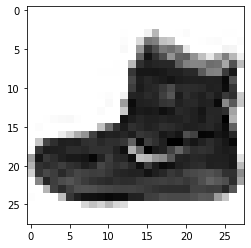

In [ ]:
plt.imshow(train_images[0],cmap=plt.cm.binary)

The labels in the dataset are encoded.

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Assigning our own labels

In [ ]:
class_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

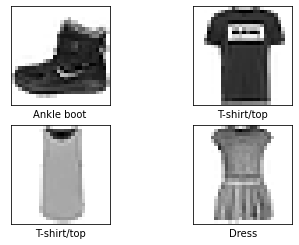

In [ ]:
#Displaying the first 4 images

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_labels[train_labels[i]])

plt.show()

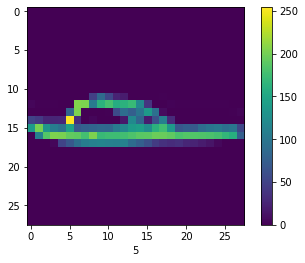

In [ ]:
plt.figure()
plt.imshow(train_images[30])
plt.xlabel(train_labels[30])
plt.colorbar()
plt.show()

**PREPROCESSING DATA**


In [ ]:
train_images, test_images= train_images/255, test_images/255

**BUILDING THE MODEL**

Building the architecture of the model.

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #Input layer
model.add(keras.layers.Dense(128,activation='relu')) #Hidden layer 1
model.add(keras.layers.Dense(256,activation='relu')) #Hidden layer 2
model.add(keras.layers.Dense(10,activation='softmax'))  #Output layer

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fitting the model

In [ ]:
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4778 - accuracy: 0.8277 - val_loss: 0.4039 - val_accuracy: 0.8513
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3618 - accuracy: 0.8668 - val_loss: 0.3781 - val_accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3242 - accuracy: 0.8794 - val_loss: 0.3667 - val_accuracy: 0.8697
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3029 - accuracy: 0.8866 - val_loss: 0.3495 - val_accuracy: 0.8703
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2846 - accuracy: 0.8934 - val_loss: 0.3314 - val_accuracy: 0.8801


In [ ]:
test_loss ,test_acc=model.evaluate(test_images,test_labels,verbose=1)

print("TEST ACCURACY:",test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8864
TEST ACCURACY: 0.8863999843597412


**Saving the model for later use**

In [ ]:
model.save('Classify_im.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Classify_im.model/assets


In [ ]:
model1= keras.models.load_model('Classify_im.model')

Making predictions from test dataset

In [ ]:
predictions=model.predict(test_images)
predictions

array([[1.15240684e-04, 1.08060303e-05, 1.64524899e-04, ...,
        1.48147866e-01, 7.80629169e-04, 6.87232554e-01],
       [5.10908358e-05, 1.38310063e-09, 9.95135844e-01, ...,
        7.32046097e-13, 2.61523667e-07, 1.64099225e-12],
       [6.33254338e-10, 1.00000000e+00, 3.48871127e-12, ...,
        8.63727649e-20, 2.13570828e-12, 2.07482441e-17],
       ...,
       [1.69645882e-05, 7.13607307e-09, 1.38033629e-05, ...,
        2.11594013e-08, 9.99938130e-01, 5.09256026e-10],
       [2.22170227e-10, 9.99999881e-01, 3.03741789e-11, ...,
        1.17107021e-13, 2.11808882e-09, 1.12837083e-12],
       [1.66689806e-05, 4.01750953e-07, 3.81477439e-05, ...,
        2.29659397e-03, 1.71072420e-03, 2.57285296e-06]], dtype=float32)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
predictions[18]

array([5.0569754e-05, 1.0609588e-08, 6.6743510e-06, 7.0707387e-07,
       2.4068395e-06, 2.9923891e-07, 9.1718131e-05, 3.8005865e-07,
       9.9984705e-01, 8.5806597e-08], dtype=float32)

In [ ]:
np.argmax(predictions[18])

8

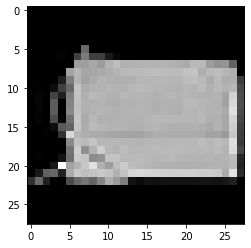

In [ ]:
plt.imshow(test_images[18],cmap="gray")

In [ ]:
for j in range(10):
  print(j,class_labels[j])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


**Testing the model on foreign data**

Importing libraries

In [ ]:
from keras.preprocessing import image


Using TensorFlow backend.


Loading and showing the image

In [ ]:
img=image.load_img(r'/content/car.jpg',target_size=(28,28),color_mode='grayscale')


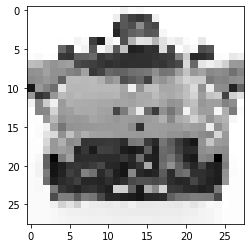

In [ ]:
plt.imshow(img,cmap="gray")


Conversion of image into a desirable format

In [ ]:
img=image.img_to_array(img) #Converting an image to an array which stores the grayscale values of each pixel
img/=255    #Normalizing the array
img=np.array([img]) #Converting it into a suitable form


Predicting the label

In [ ]:
p=model.predict_classes([img])
print(p)

[8]


In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

No handles with labels found to put in legend.


[0.8277333378791809, 0.8668333292007446, 0.8794000148773193, 0.8866333365440369, 0.8933666944503784]


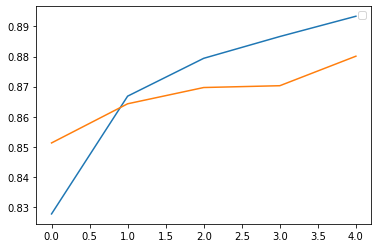

In [ ]:
acc= history.history['accuracy']
val_acc =history.history['val_accuracy']

epochs = range(len(acc))
print(acc)
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.legend()

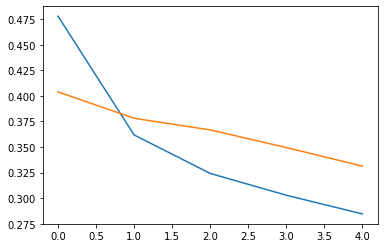

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)